In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/DE Batch /i1.csv')
df2=pd.read_csv('/content/drive/MyDrive/DE Batch /i2.csv')

In [ ]:
merge=df1.merge(df2,how='outer')

In [ ]:
merge.shape

(15621, 16)

In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB


In [ ]:
merge.describe()

,Invoice No.,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Covers,HSN
count,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15613.000000,15621.0,0.0
mean,25989.963127,116.608988,1.338839,147.407080,1.262818,7.303668,153.447930,18.068340,0.0,NaN
std,1433.192998,63.663769,0.949814,210.127442,6.656396,10.461474,219.678163,17.191377,0.0,NaN
min,23465.000000,12.000000,1.000000,12.000000,0.000000,0.000000,12.600000,1.000000,0.0,NaN
25%,24751.000000,50.000000,1.000000,80.000000,0.000000,4.000000,84.000000,4.000000,0.0,NaN
50%,25980.000000,140.000000,1.000000,150.000000,0.000000,7.000000,147.000000,12.000000,0.0,NaN
75%,27274.000000,160.000000,1.000000,170.000000,0.000000,8.500000,178.500000,26.000000,0.0,NaN
max,28389.000000,770.000000,28.000000,21560.000000,288.000000,1078.000000,22638.000000,50.000000,0.0,NaN


In [ ]:
a=merge["Invoice No."].nunique()
print(a)

4925


In [ ]:
b=merge["Final Total"].sum()
print(b)

2397010.12


In [ ]:
print(b/a)

486.70256243654825


In [ ]:
print(merge['Invoice No.'].groupby(merge['Invoice No.']==28327))

In [ ]:
invoice_totals = merge.groupby('Invoice No.')['Final Total'].sum()
display(invoice_totals)

,Final Total
Invoice No.,
23465,1134.00
23466,441.00
23467,774.88
23468,273.00
23469,462.00
...,...
28385,493.50
28386,1479.44
28387,1501.50


In [ ]:
invoice_totals.loc[28327]

np.float64(1081.5)

In [ ]:
merge['Qty.'].max()

28.0

In [ ]:
merge['Final Total'].max()

22638.0

In [ ]:
merge.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)[0:3]

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0


In [ ]:
merge.groupby('Item Name')['Final Total'].sum().sort_values(ascending=False)[0:5]

,Final Total
Item Name,
Chicken Biriyani With Raitha And Gravy,240730.96
Chicken Fried Rice,119347.20
Butter Naan,65387.74
Thandoor Chicken Half,53185.83
Paneer Butter Masala,49581.22


In [ ]:
import matplotlib.pyplot as plt

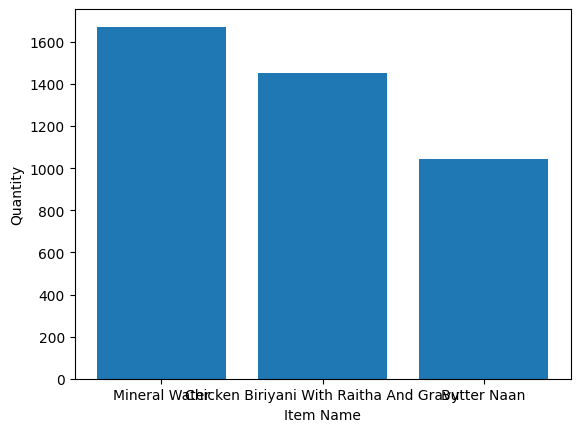

In [ ]:
top_3_items_qty = merge.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False).head(3)
plt.bar(top_3_items_qty.index, top_3_items_qty.values)
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.show()

In [ ]:
merge['Date'] = pd.to_datetime(merge['Date'])
merge[merge['Date'] == '2023-09-14'].groupby('Invoice No.') ['Final Total'].sum().sort_values(ascending=False)


,Final Total
Invoice No.,
28215,1492.20
28195,1218.00
28220,1005.52
28216,838.94
28197,585.90
28209,504.00
28196,500.86
28198,492.46
28221,456.76


In [ ]:
merge.groupby('Invoice No.')['Final Total'].mean()

,Final Total
Invoice No.,
23465,162.000000
23466,110.250000
23467,193.720000
23468,273.000000
23469,115.500000
...,...
28385,98.700000
28386,211.348571
28387,250.250000


In [ ]:
print(invoice_totals.mean())

print(invoice_totals[invoice_totals > invoice_totals.mean()].count())

486.70256243654825
1458


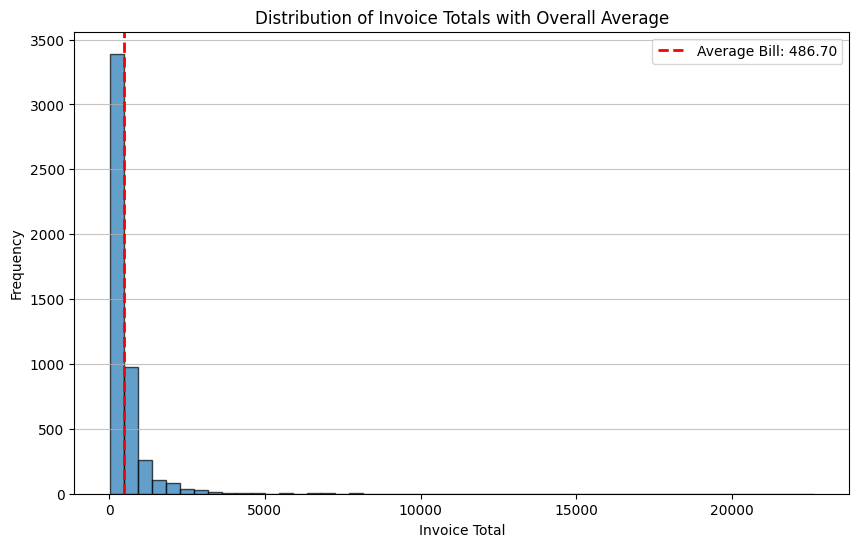

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(invoice_totals, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(invoice_totals.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Average Bill: {invoice_totals.mean():.2f}')
plt.xlabel('Invoice Total')
plt.ylabel('Frequency')
plt.title('Distribution of Invoice Totals with Overall Average')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()